In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

2.18.0


In [17]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [18]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
def make_model(learning_rate=0.002):
    inputs = keras.Input(shape=(200,200,3))
    conv_layer = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
    reduce_map = keras.layers.MaxPooling2D(pool_size=(2,2))(conv_layer)
    vectors = keras.layers.Flatten()(reduce_map)
    inner_layer = keras.layers.Dense(64, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner_layer)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy() #since we specify an activation for the output layer, we don't need to set from_logits=True

    model.compile(optimizer=optimizer,
                 loss=loss,
                 metrics=['accuracy'])

    return model


In [20]:
learning_rate=0.002

model = make_model(learning_rate=0.002)

In [21]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
train_generator = ImageDataGenerator(rescale=1./255)

train_ds = train_generator.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',  # Ensures labels are binary (0 or 1)
    shuffle=True
)

X, y = next(train_ds)
print(X.shape, y.shape)

print(np.unique(y)) 

Found 800 images belonging to 2 classes.
(20, 200, 200, 3) (20,)
[0. 1.]


In [23]:
train_ds.class_indices

{'curly': 0, 'straight': 1}

In [24]:
test_generator = ImageDataGenerator(rescale=1./255)

test_ds = test_generator.flow_from_directory(
    './data/test',
    target_size=(200, 200),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [25]:
test_ds.class_indices

{'curly': 0, 'straight': 1}

In [26]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.5302 - loss: 0.7364 - val_accuracy: 0.5572 - val_loss: 0.6597
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.6530 - loss: 0.6078 - val_accuracy: 0.5622 - val_loss: 0.7223
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.6709 - loss: 0.5875 - val_accuracy: 0.6219 - val_loss: 0.6313
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.6957 - loss: 0.5585 - val_accuracy: 0.6119 - val_loss: 0.6541
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.7377 - loss: 0.5193 - val_accuracy: 0.6219 - val_loss: 0.6566
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.7283 - loss: 0.5343 - val_accuracy: 0.6318 - val_loss: 0.6334
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.7776 - loss: 0.4897 - val_accuracy: 0.5970 - val_loss: 0.6661
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.7581 - loss: 0.5091 - val_accuracy: 0.582

In [27]:
hist = history.history

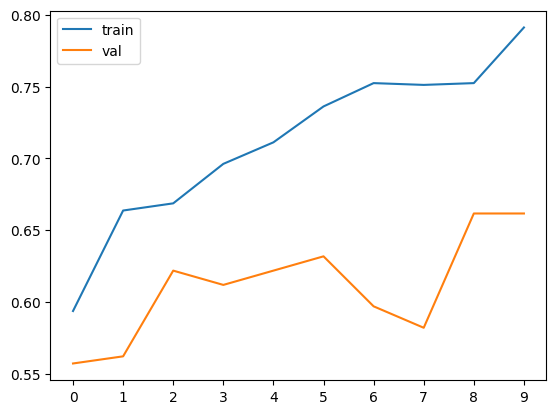

In [28]:
plt.plot(hist['accuracy'], label=('train'))
plt.plot(hist['val_accuracy'], label=('val'))

plt.xticks(np.arange(10))
plt.legend()

In [29]:
print(np.median(hist['accuracy']))

0.7237499952316284


In [30]:
print(np.std(hist['loss']))

0.05930138779535613


In [31]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=50,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                    )

train_ds = train_generator.flow_from_directory(
    './data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',  # Ensures labels are binary (0 or 1)
    shuffle=True
)

test_generator = ImageDataGenerator(rescale=1./255)

test_ds = test_generator.flow_from_directory(
    './data/test',
    target_size=(200, 200),
    class_mode='binary',
    batch_size=20,
    shuffle=True
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [32]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 341ms/step - accuracy: 0.6277 - loss: 0.6688 - val_accuracy: 0.6915 - val_loss: 0.6080
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 338ms/step - accuracy: 0.6773 - loss: 0.6026 - val_accuracy: 0.6915 - val_loss: 0.5821
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 342ms/step - accuracy: 0.6411 - loss: 0.6139 - val_accuracy: 0.6716 - val_loss: 0.5890
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - accuracy: 0.6655 - loss: 0.6075 - val_accuracy: 0.6766 - val_loss: 0.5793
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 336ms/step - accuracy: 0.6899 - loss: 0.5878 - val_accuracy: 0.6816 - val_loss: 0.5911
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 340ms/step - accuracy: 0.6694 - loss: 0.6136 - val_accuracy: 0.6866 - val_loss: 0.5744
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 339ms/step - accuracy: 0.6902 - loss: 0.5830 - val_accuracy: 0.6915 - val_loss: 0.5720
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 340ms/step - accuracy: 0.7028 - loss: 0.5707 - val_accu

In [34]:
hist = history.history
hist

{'accuracy': [0.6337500214576721,
  0.6700000166893005,
  0.6675000190734863,
  0.6575000286102295,
  0.6812499761581421,
  0.6850000023841858,
  0.7024999856948853,
  0.7049999833106995,
  0.6937500238418579,
  0.6549999713897705],
 'loss': [0.6442587375640869,
  0.6075387001037598,
  0.6018329858779907,
  0.6191499829292297,
  0.5908738374710083,
  0.5948541164398193,
  0.5743597149848938,
  0.5682509541511536,
  0.5671061873435974,
  0.5969392657279968],
 'val_accuracy': [0.6915422677993774,
  0.6915422677993774,
  0.6716417670249939,
  0.676616907119751,
  0.6815920472145081,
  0.6865671873092651,
  0.6915422677993774,
  0.7014925479888916,
  0.6965174078941345,
  0.6915422677993774],
 'val_loss': [0.6080355048179626,
  0.5820595026016235,
  0.5890285968780518,
  0.5792649984359741,
  0.5911295413970947,
  0.5744116306304932,
  0.5719661116600037,
  0.5646107196807861,
  0.5599920749664307,
  0.6006226539611816]}

In [36]:
print(np.mean(hist['val_loss']))

0.5821121335029602


In [41]:
hist['val_accuracy']

[0.6915422677993774,
 0.6915422677993774,
 0.6716417670249939,
 0.676616907119751,
 0.6815920472145081,
 0.6865671873092651,
 0.6915422677993774,
 0.7014925479888916,
 0.6965174078941345,
 0.6915422677993774]

In [ ]:
print(np.mean(hist['val_accuracy']))